In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

from datetime import datetime,timedelta
rcParams['figure.figsize'] = 10,6

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')
indexedDataset = data.set_index(['Month'])

In [ ]:
indexedDataset.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [ ]:
indexedDataset.dtypes
indexedDataset.shape
indexedDataset.isnull().sum()
indexedDataset=indexedDataset.dropna(how='any',axis=0) #dropping rows that hav null values
#indexedDataset.rename(columns={'':'','':''})
#indexedDataset['Date'] = pd.todatetime(indexedDataset['date'])
#indexedDataset.set_index('Date',inplace=True)
indexedDataset.describe()
#indexedDataset['Year'] = indexedDataset.index.Year #creating year column
#latest_df = df.loc['1980':'2013']
plt.figure(figsize=(9,4))
# sns.lineplot(x="Year",y="av_temp",data=df)#plotting avvg temp by year
# plt.show()

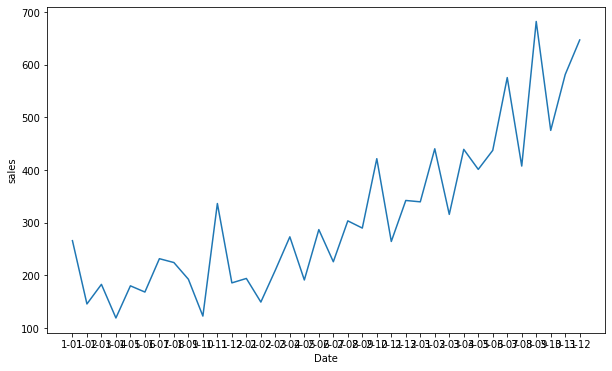

In [ ]:
plt.xlabel("Date")
plt.ylabel("sales")
plt.plot(indexedDataset)

In [ ]:
#test for stationarity
#determining rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            Sales
Month            
1-01          NaN
1-02          NaN
1-03          NaN
1-04          NaN
1-05          NaN
1-06          NaN
1-07          NaN
1-08          NaN
1-09          NaN
1-10          NaN
1-11          NaN
1-12   196.458333
2-01   190.483333
2-02   190.783333
2-03   193.033333
2-04   205.866667
2-05   206.791667
2-06   216.666667
2-07   216.183333
2-08   222.775000
2-09   230.866667
2-10   255.758333
2-11   249.758333
2-12   262.791667
3-01   274.908333
3-02   299.150000
3-03   307.966667
3-04   321.800000
3-05   339.291667
3-06   351.825000
3-07   380.950000
3-08   389.616667
3-09   422.291667
3-10   426.766667
3-11   453.166667
3-12   478.550000             Sales
Month            
1-01          NaN
1-02          NaN
1-03          NaN
1-04          NaN
1-05          NaN
1-06          NaN
1-07          NaN
1-08          NaN
1-09          NaN
1-10          NaN
1-11          NaN
1-12    61.606913
2-01    57.595562
2-02    57.351085
2-03    57.551532
2-04    56

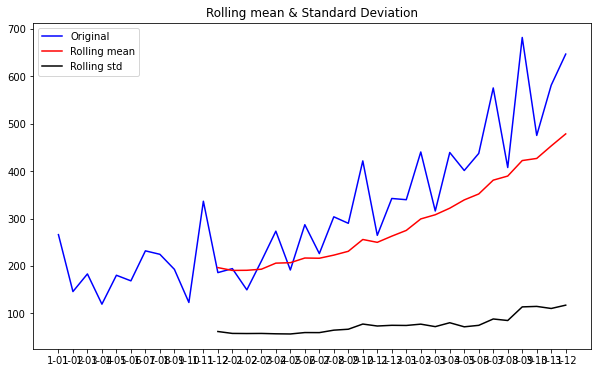

In [ ]:
#plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title("Rolling mean & Standard Deviation")
plt.show(block=False)

#concluding that this is not a stationary dataset

In [ ]:
#Performing Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Sales'], autolag='AIC') #info about what we want in time series

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

#p-value should always be less (<0.5) & test statistics should be less than critical value
# since this rejects the null hypothesis, we can say that the data is non-stationary

Results of Dickey-Fuller Test:
Test Statistic                  3.060142
p-value                         1.000000
#Lags used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


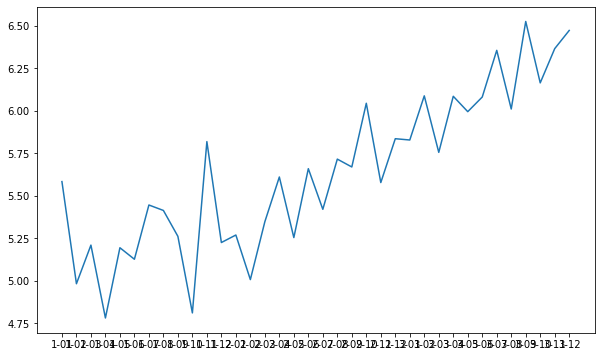

In [ ]:
#Extimated trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

No handles with labels found to put in legend.


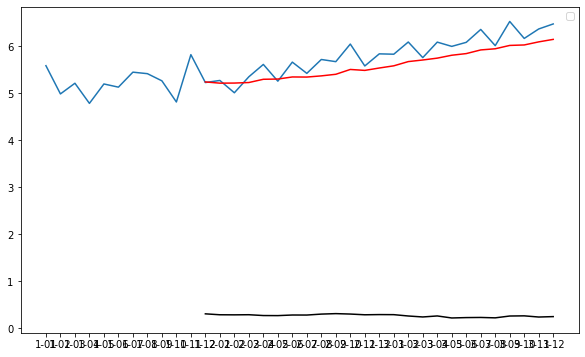

In [ ]:
#calculate moving average for the same window size

movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()

plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='Red')
plt.plot(movingSTD, color='Black')
plt.legend(loc='best')

#we can cleary see that data is not stationary

In [ ]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#remove Nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Sales
Month,
1-12,-0.012810
2-01,0.057558
2-02,-0.206580
2-03,0.122245
2-04,0.316154
2-05,-0.045029
2-06,0.315709
2-07,0.078873
2-08,0.348896


In [ ]:
#adcf test to determine if the data is stationary

def test_stationarity(timeseries):

  #determine rolling statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()

  #plot rolling statistics
  orig = plt.plot(timeseries,color='blue',label='Original')
  mean = plt.plot(movingAverage,color='red',label='Rolling Mean')
  std = plt.plot(movingSTD,color='black',label='Rolling STD')
  plt.legend(loc='best')
  plt.title('Rolling mean & STD')
  plt.show(block=False)

  #Perform Dickey Fuller Test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['Sales'], autolag='AIC') #info about what we want in time series
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used', 'Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

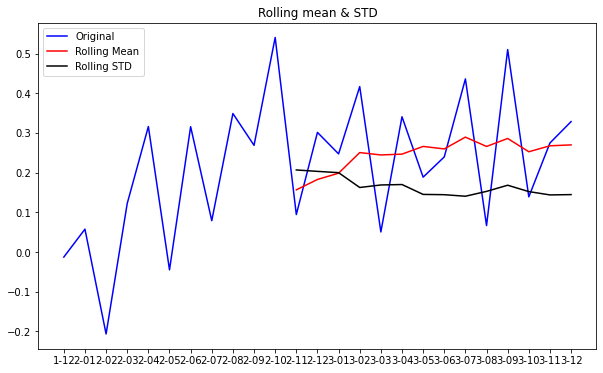

Results of Dickey-Fuller Test:
Test Statistic                 -2.866638
p-value                         0.049367
#Lags used                      8.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

#p value is relatively less
#also critical value and test statistic value is almost equal. this helps us to determine that the data is stationary

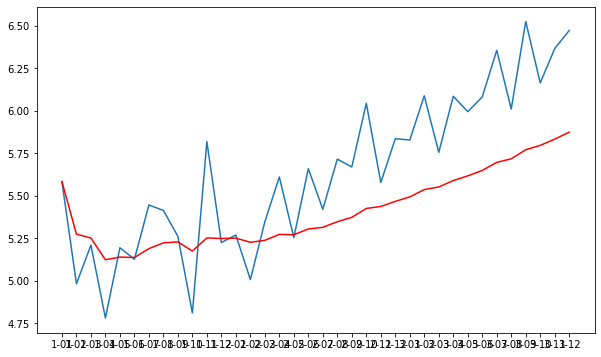

In [ ]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

#to see the trend in the timeseries

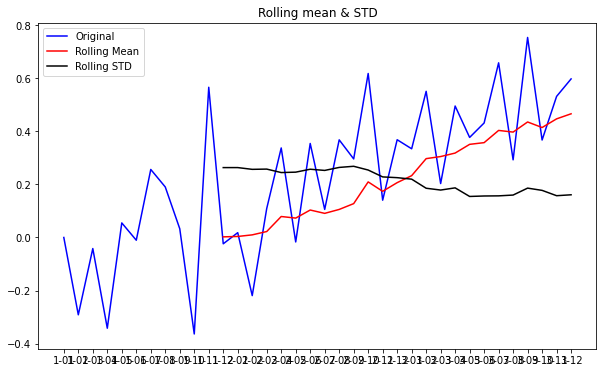

Results of Dickey-Fuller Test:
Test Statistic                 -0.945353
p-value                         0.772671
#Lags used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [ ]:
#another transformation to check data stationarity. check for p<0.5
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale-exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

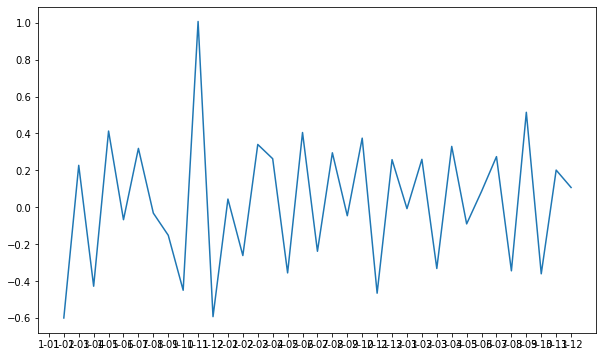

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

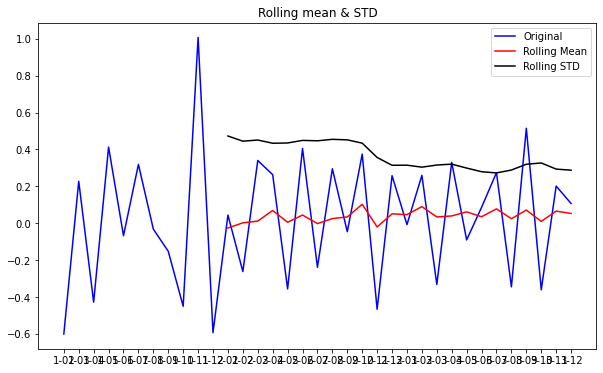

Results of Dickey-Fuller Test:
Test Statistic                 -2.168202
p-value                         0.217988
#Lags used                     10.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

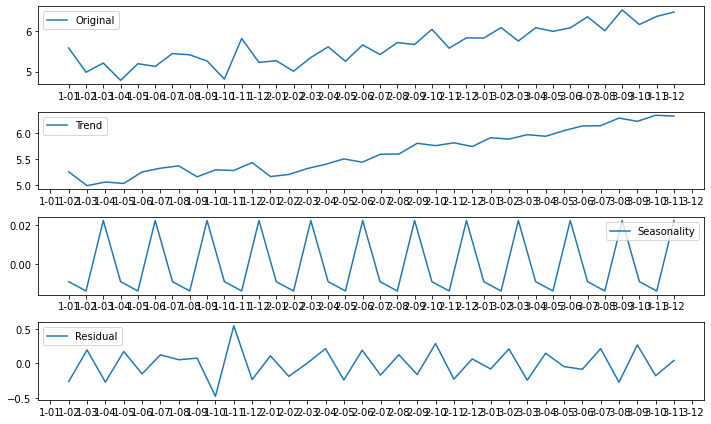

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition =seasonal_decompose(indexedDataset_logScale, freq=3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()




In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


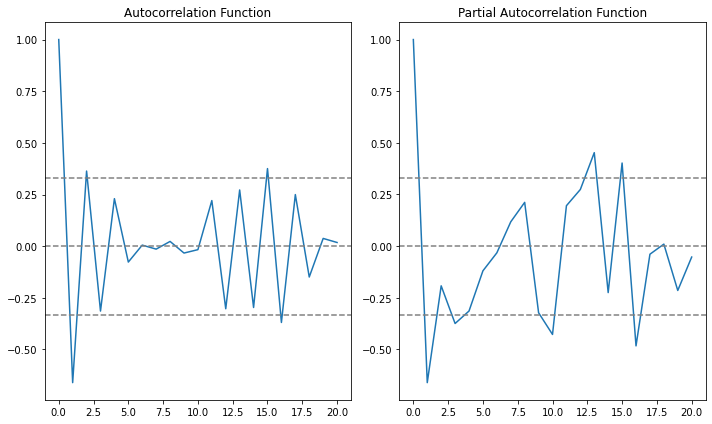

In [ ]:
#ACF and PACF plots:
datasetLogDiffShifting.dropna(inplace=True)
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting,nlags=20,method='ols') #ordinary least squared method

#plot acf (for q value)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='grey')
plt.title('Autocorrelation Function')

#plot pacf (for p value)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='grey')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#for p,q value, where the graph first cuts 0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR Model


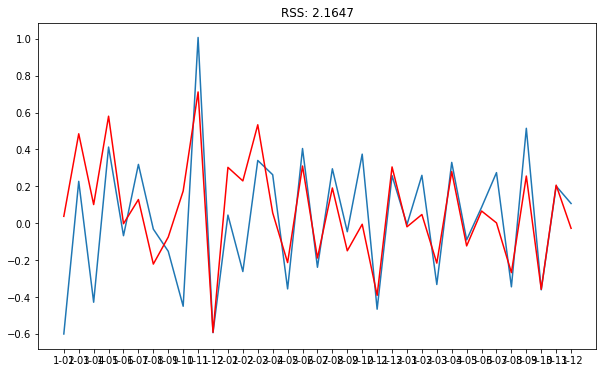

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#AR model
model = ARIMA(indexedDataset_logScale, order=(1,1,1)) #1st 1 is AR cuts 0 (p value
#2nd 1 is differenced with 1 and 3rd 1 is q value
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Sales'])**2))
print('Plotting AR Model')

#lesser RSS better

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting MA Model


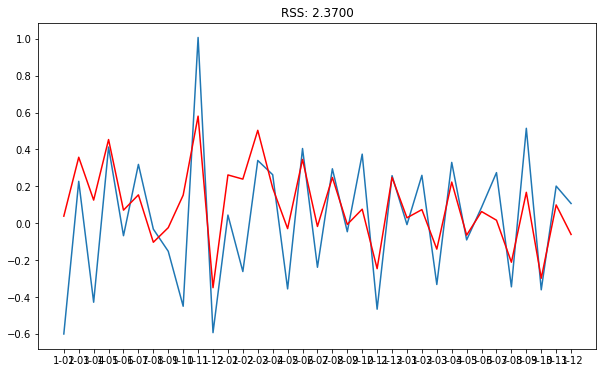

In [ ]:
#MA Model
model = ARIMA(indexedDataset_logScale,order=(0,1,1))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Sales'])**2))
print('Plotting MA Model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR Model


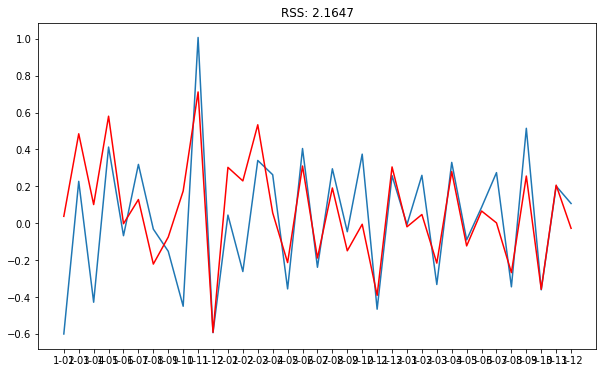

In [ ]:
#combining both models
model=ARIMA(indexedDataset_logScale,order=(1,1,1))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Sales'])**2))
print('Plotting AR Model')

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1-02    0.037293
1-03    0.484970
1-04    0.101135
1-05    0.580283
1-06   -0.002748
dtype: float64


In [ ]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1-02    0.037293
1-03    0.522263
1-04    0.623399
1-05    1.203682
1-06    1.200934
dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Sales'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1-01    5.583496
1-02    5.620790
1-03    6.105760
1-04    6.206895
1-05    6.787178
dtype: float64

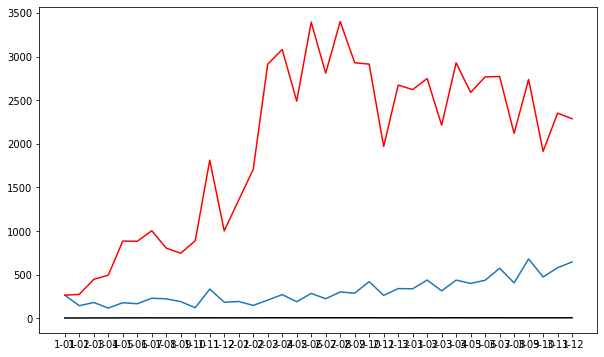

In [ ]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA,color='red')

In [ ]:
indexedDataset_logScale

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


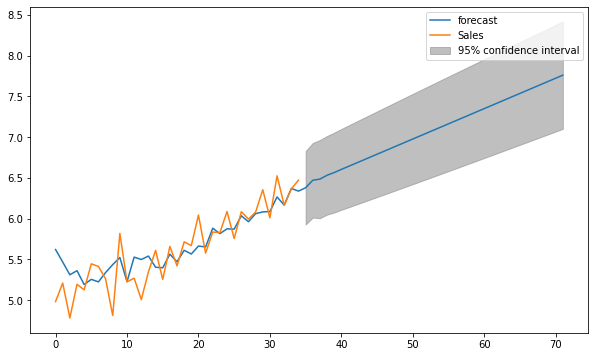

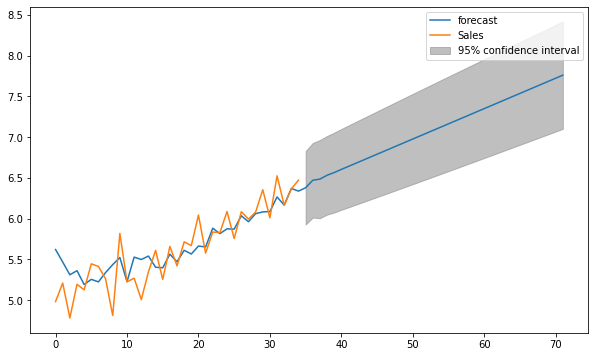

In [ ]:
results_ARIMA.plot_predict(1,72) #how many more days/years/months u want to predict + existing data set
#plots graph

In [ ]:
results_ARIMA.forecast(steps=36)#gives values of prediction